# Author: Midrar Adham
## HW5: Harris "Corners"

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Harris "Corners"

**Show the image in color and grayscale**
---

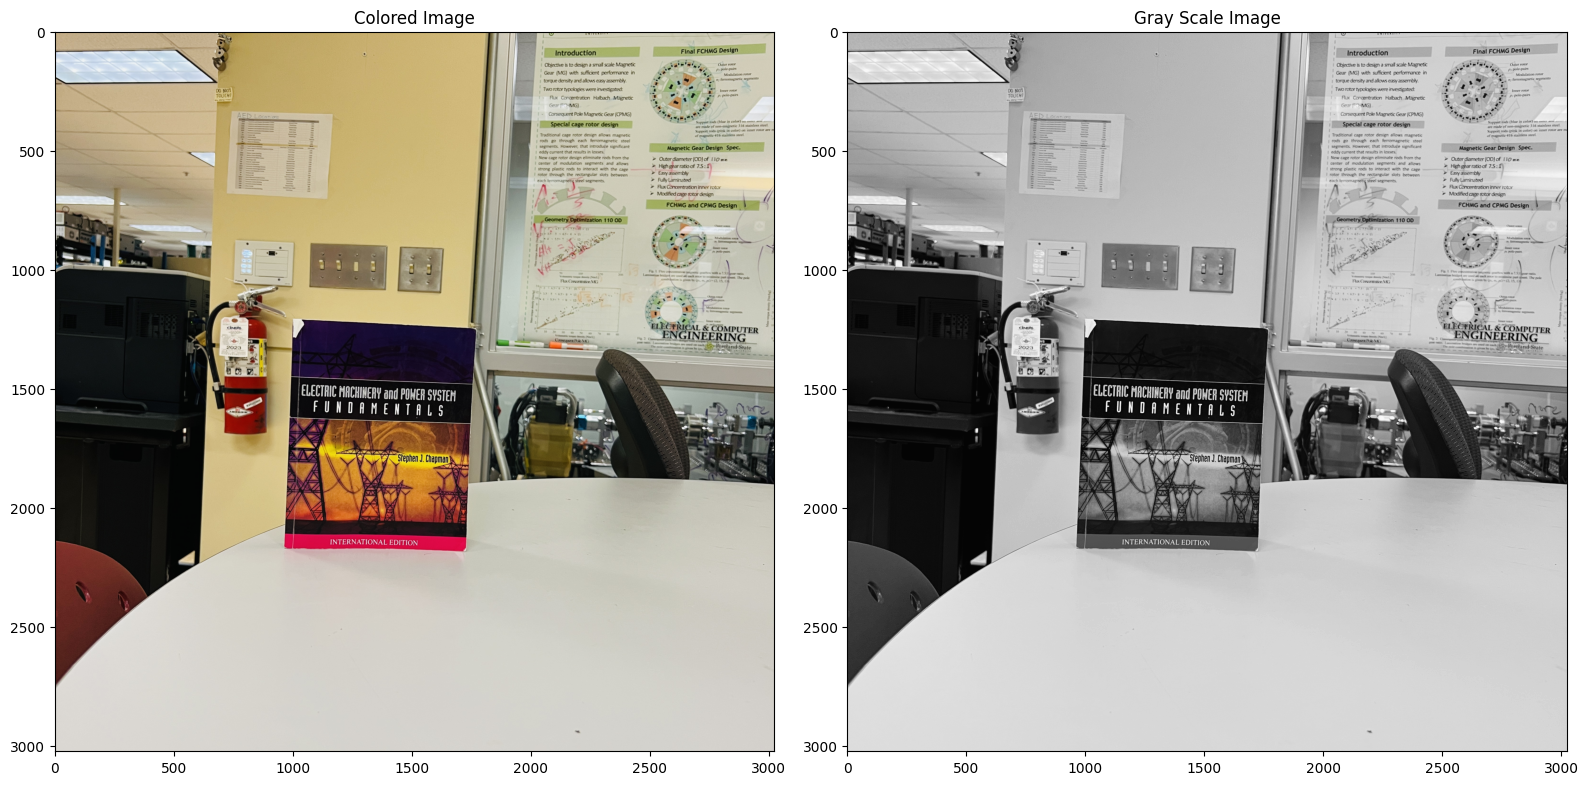

In [45]:
figure, ax = plt.subplots(1,2, figsize = (16,16))
# img_color = cv.imread('../../sample_data/road.jpg')
img_color = cv.imread('../../sample_data/book.JPG')
img_color = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_color.copy(),cv.COLOR_RGB2GRAY)

ax[0].imshow(img_color)
ax[0].set_title('Colored Image')
ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title('Gray Scale Image')
plt.tight_layout()

**Show the gradient components of the partial derivative in the horizontal and vertical directions.**
---

/var/folders/sp/4nnyx1h538x21hb2zw4znx9c0000gn/T/ipykernel_2615/2343692734.py:15: RuntimeWarning: overflow encountered in scalar subtract
  dx[y,x] = (img[y, x+1] - img[y, x-1]) / 2
/var/folders/sp/4nnyx1h538x21hb2zw4znx9c0000gn/T/ipykernel_2615/2343692734.py:16: RuntimeWarning: overflow encountered in scalar subtract
  dy[y, x] = (img[y+1, x] - img[y-1, x]) / 2


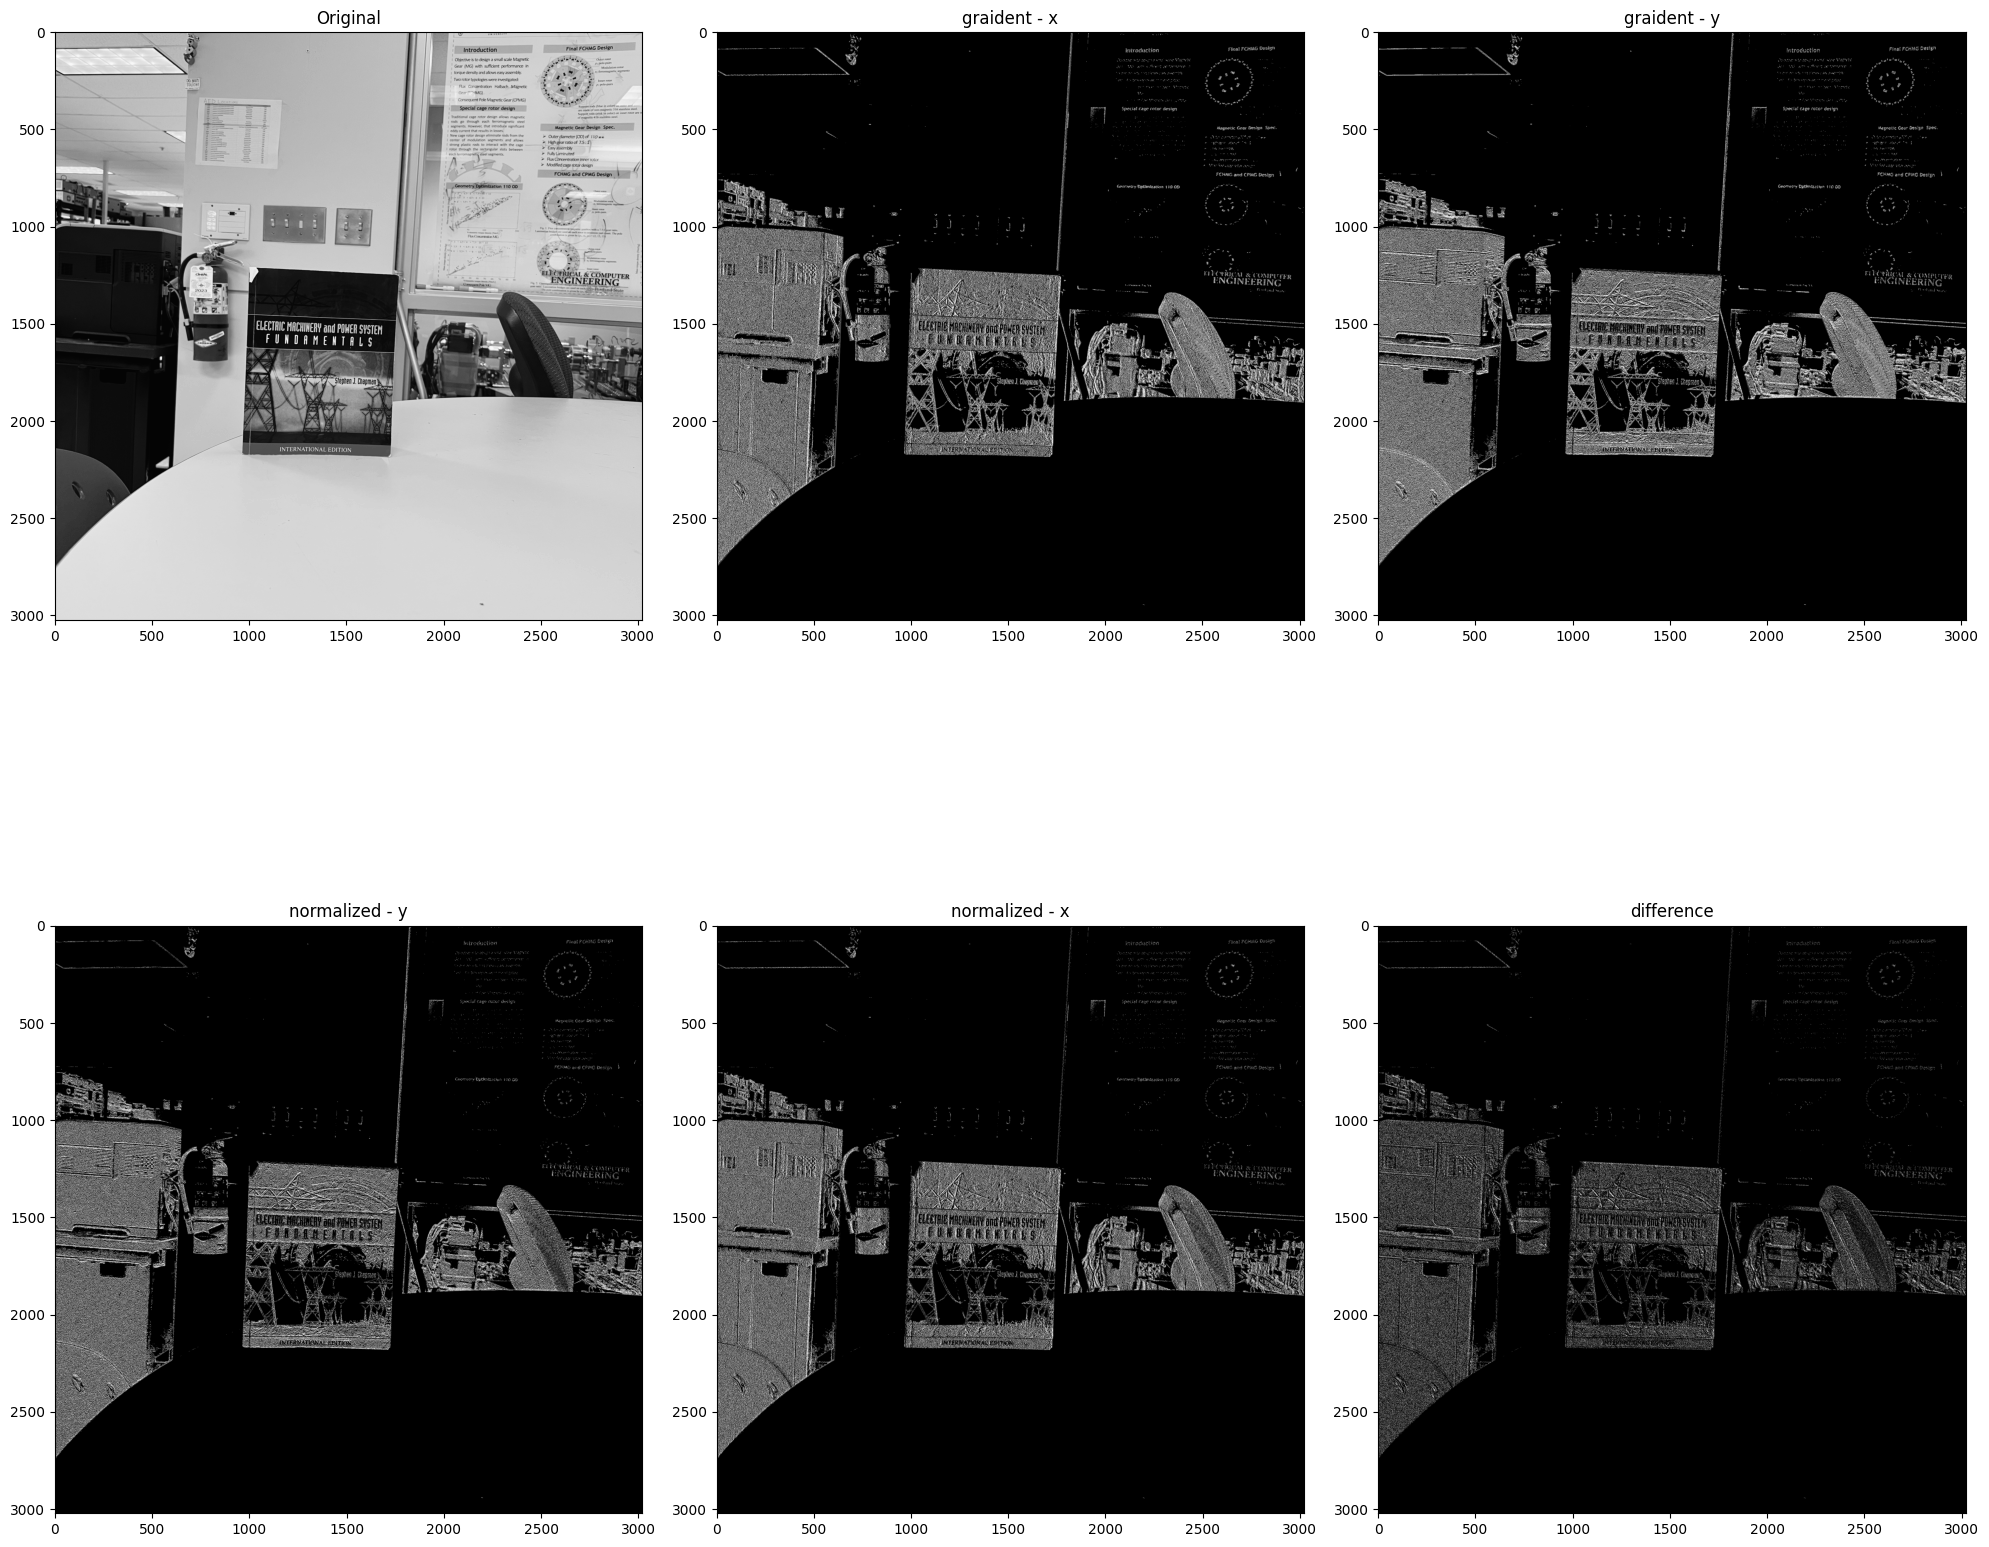

In [51]:
img = img_gray.copy()
border_size = 1

# img = cv.copyMakeBorder(img, border_size,border_size,border_size,border_size, borderType=cv.BORDER_REFLECT101, value=0)
img = cv.filter2D(img, ddepth=-1, kernel=3)

img_rows = img.shape[0]
img_cols = img.shape[1]

dx = np.zeros_like(img, dtype=np.float32)
dy = np.zeros_like(img, dtype=np.float32)

for y in range(border_size, img_rows - border_size):
    for x in range(border_size, img_cols - border_size):
        dx[y,x] = (img[y, x+1] - img[y, x-1]) / 2
        dy[y, x] = (img[y+1, x] - img[y-1, x]) / 2

gradient_x = dx[border_size:-border_size, border_size:-border_size]
gradient_y = dy[border_size:-border_size, border_size:-border_size]

gradient_x_norm = cv.normalize(gradient_x, None, -255, 255, cv.NORM_MINMAX, cv.CV_8U)
gradient_y_norm = cv.normalize(gradient_y, None, -255, 255, cv.NORM_MINMAX, cv.CV_8U)

gradient_mag = cv.magnitude(gradient_x, gradient_y)

gradient_mag_norm = cv.normalize(gradient_mag, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

diff = cv.subtract(gradient_x_norm, gradient_y_norm)

figure = plt.figure(figsize=(20,20))
figure.clf()

axes = figure.add_subplot(231)
axes.imshow(img_gray,cmap='gray')
axes.set_title('Original')

axes = figure.add_subplot(232)
axes.imshow(dx,cmap='gray')
axes.set_title('graident - x')

axes = figure.add_subplot(233)
axes.imshow(dy,cmap='gray')
axes.set_title('graident - y')

axes = figure.add_subplot(234)
axes.imshow(gradient_y_norm,cmap='gray', vmin=0, vmax=255)
axes.set_title('normalized - y')

axes = figure.add_subplot(235)
axes.imshow(gradient_x_norm,cmap='gray', vmin=0, vmax=255)
axes.set_title('normalized - x')

axes = figure.add_subplot(236)
axes.imshow(diff,cmap='gray')
axes.set_title('difference')

# axes = figure.add_subplot(237)
# axes.imshow(gradient_mag,cmap='gray')
# axes.set_title('Mag')

plt.tight_layout()

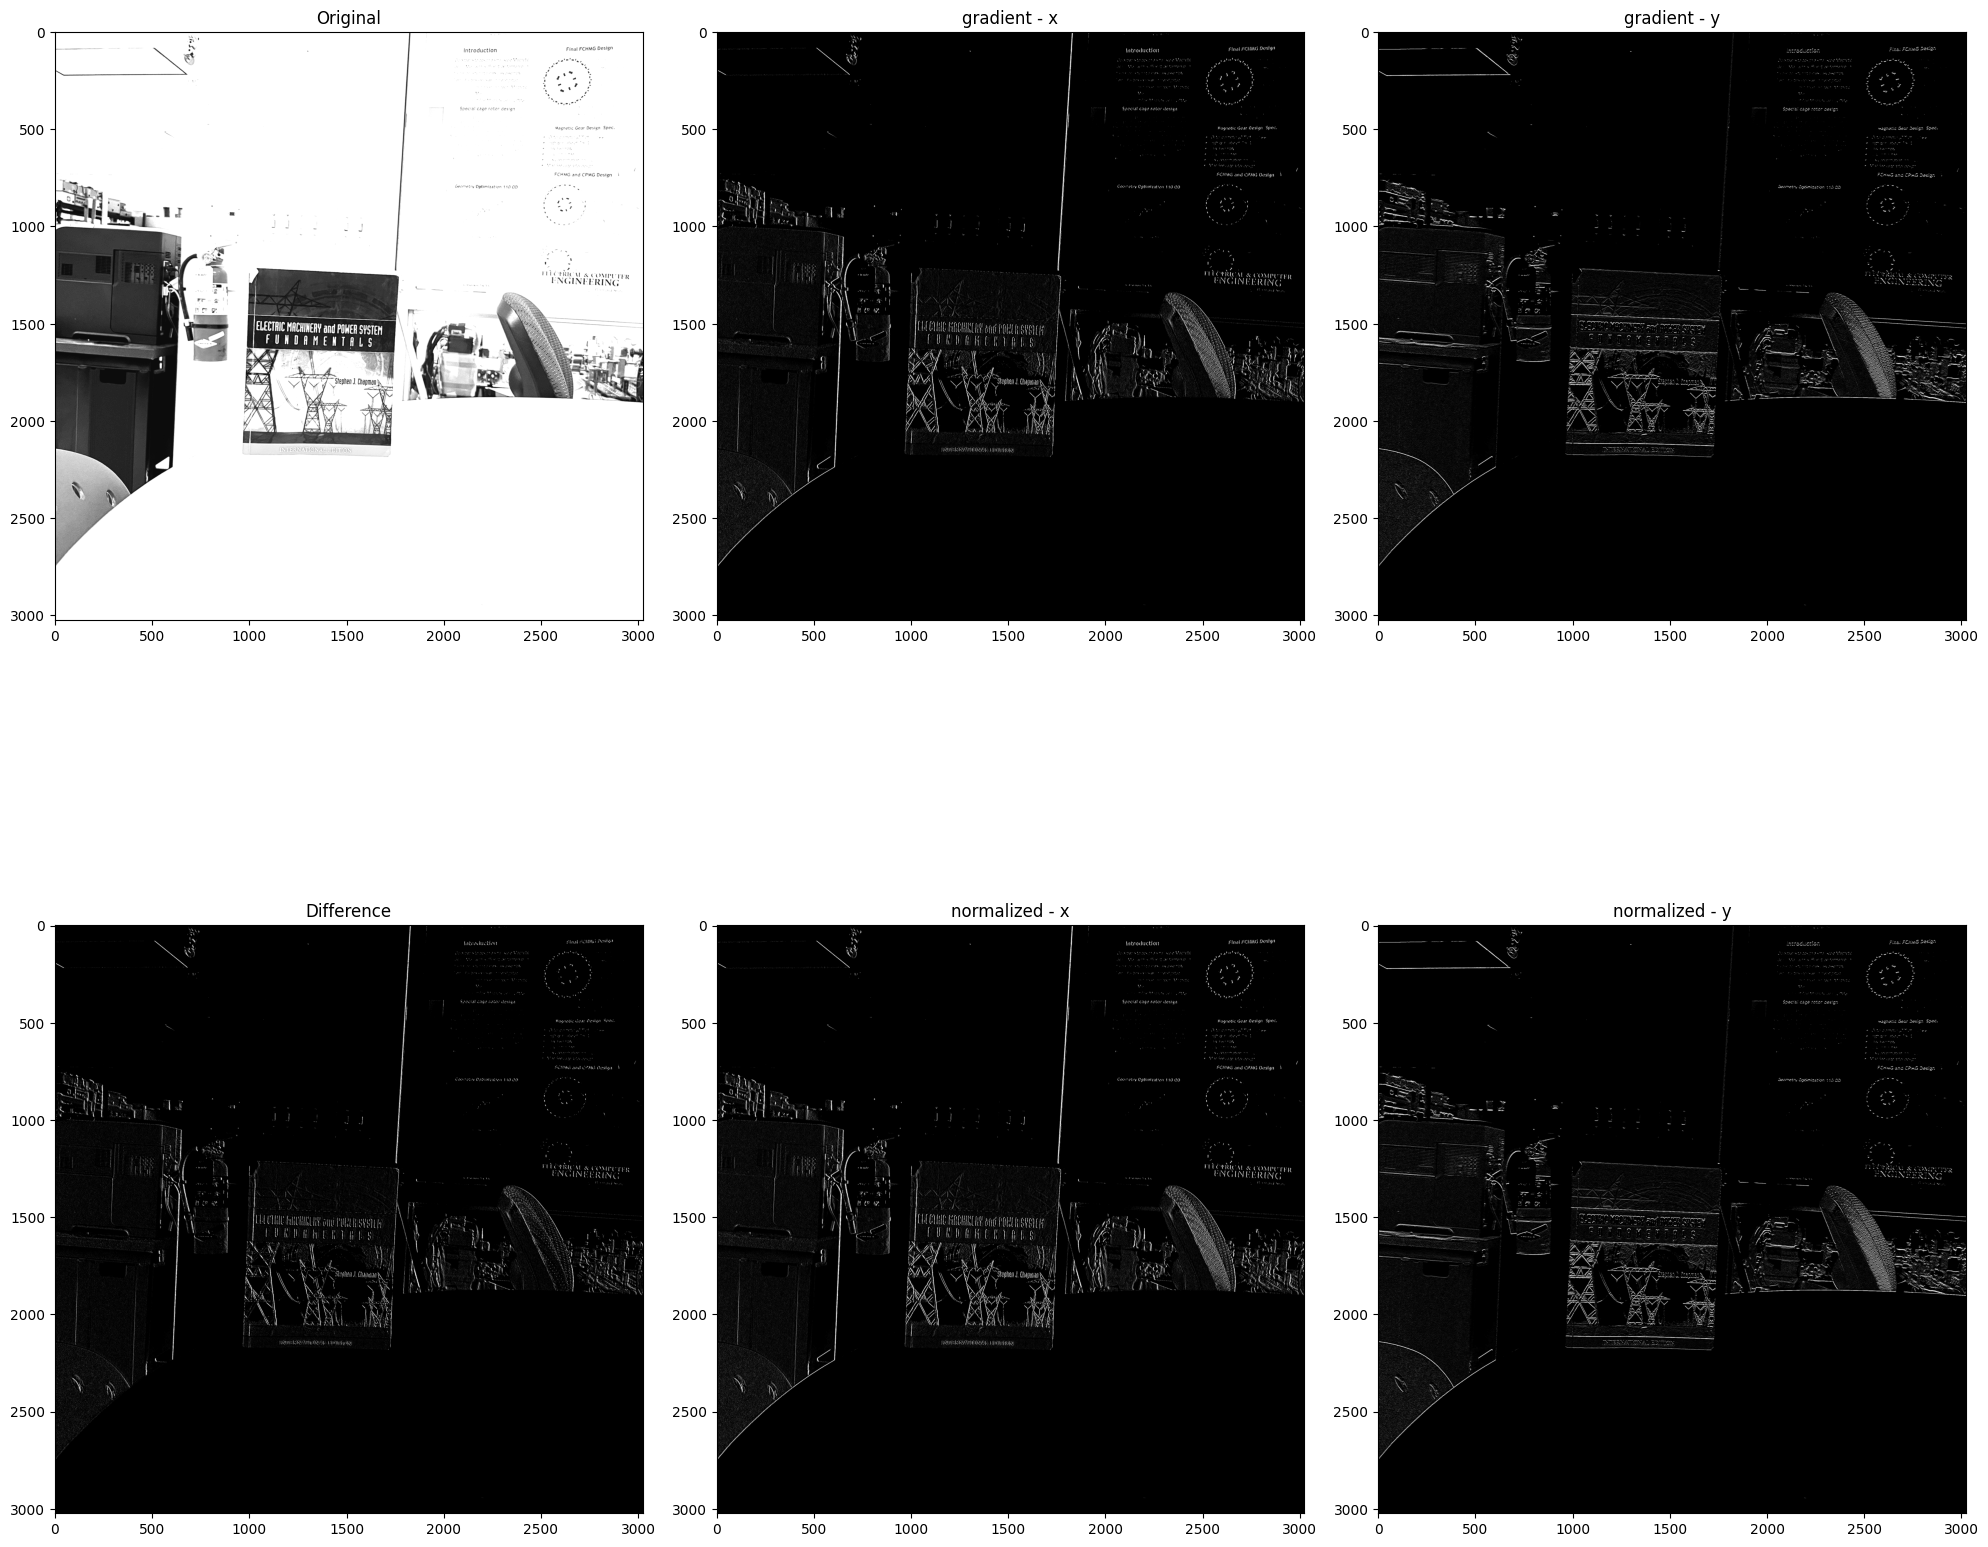

In [47]:
# Derivative with kernels:
img_1 = img.copy()
kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernel_y = np.array([[-1,-2,-1], [0,0,0],[1,2,1]])

gradient_x = cv.filter2D(src=img_1, ddepth=-1, kernel=kernel_x)
gradient_y = cv.filter2D(src=img_1, ddepth=-1, kernel=kernel_y)

n_x_gradient = cv.normalize(gradient_x, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
n_y_gradient = cv.normalize(gradient_y, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

difference = cv.subtract(gradient_x, gradient_y)

figure = plt.figure(figsize=(20,20))
figure.clf()

axes = figure.add_subplot(231)
axes.imshow(img_1,cmap='gray')
axes.set_title('Original')

axes = figure.add_subplot(232)
axes.imshow(gradient_x,cmap='gray')
axes.set_title('gradient - x')

axes = figure.add_subplot(233)
axes.imshow(gradient_y,cmap='gray')
axes.set_title('gradient - y')

axes = figure.add_subplot(234)
axes.imshow(difference,cmap='gray')
axes.set_title('Difference')

axes = figure.add_subplot(235)
axes.imshow(n_x_gradient,cmap='gray')
axes.set_title('normalized - x')

axes = figure.add_subplot(236)
axes.imshow(n_y_gradient,cmap='gray')
axes.set_title('normalized - y')

plt.tight_layout()

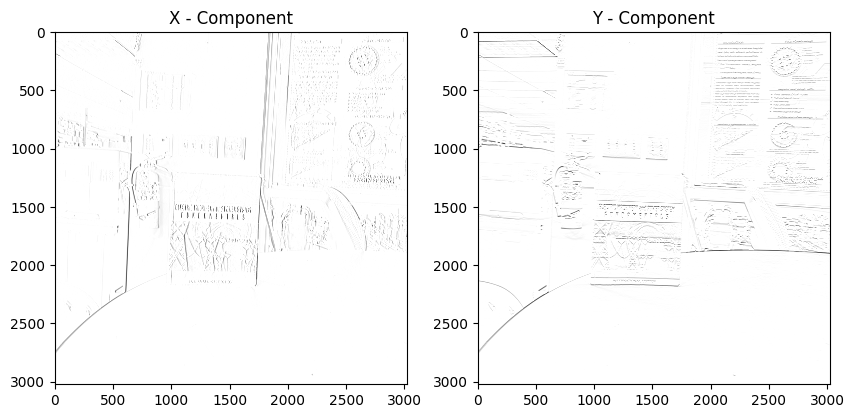

In [53]:
derivative_x = cv.Sobel(img_gray, cv.CV_64F, 1,0, ksize=3, borderType=cv.BORDER_DEFAULT)
derivative_y = cv.Sobel(img_gray, cv.CV_64F, 0,1, ksize=3, borderType=cv.BORDER_DEFAULT)
imgddr = (gradient_x+gradient_y)/2.0
imgddl = (gradient_x-gradient_y)/2.0

figure  = plt.figure(figsize=(10,10))
ax = figure.add_subplot(121)
ax.set_title('X - Component')
ax.imshow(derivative_x, cmap='gray_r', vmin=0, vmax=255)

ax = figure.add_subplot(122)
ax.set_title('Y - Component')
ax.imshow(derivative_y, cmap='gray_r', vmin=0, vmax=255)

**Explain and justify how you calculated the derivative. As we discussed in class, there are many ways to estimate the derivative of an image**
---

**Show images of the components of the matrix used for Harris corner detection. This includes the two diagonal elements and the off diagonal element**
---

725762.25


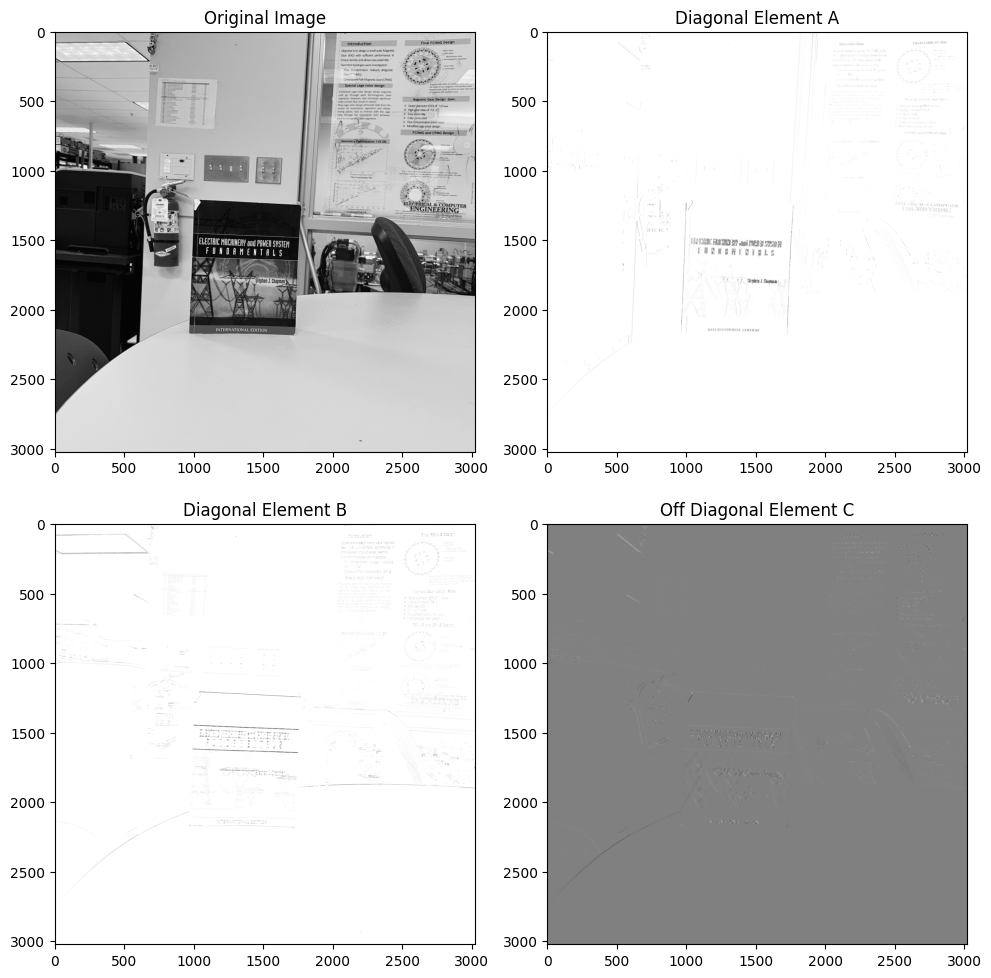

In [57]:
A = derivative_x**2
B = derivative_y**2
C = derivative_x*derivative_y

kernel = (3,3)

A = cv.GaussianBlur(A, kernel, 0)
B = cv.GaussianBlur(B, kernel, 0)
C = cv.GaussianBlur(C, kernel, 0)

figure = plt.figure(figsize=(10,10))
figure.clf()

ax = figure.add_subplot(221)
ax.imshow(img_gray, cmap='gray')
ax.set_title('Original Image')

ax = figure.add_subplot(222)
print(A.max())
ax.imshow(A, cmap='gray_r')
ax.set_title('Diagonal Element A')

ax = figure.add_subplot(223)
ax.imshow(B, cmap='gray_r')
ax.set_title('Diagonal Element B')

ax = figure.add_subplot(224)
ax.imshow(C, cmap='gray_r')

ax.set_title('Off Diagonal Element C')

plt.tight_layout()

**Calculate the figure of merit used by Harris. Plot this as an image**
---

185008.15578125


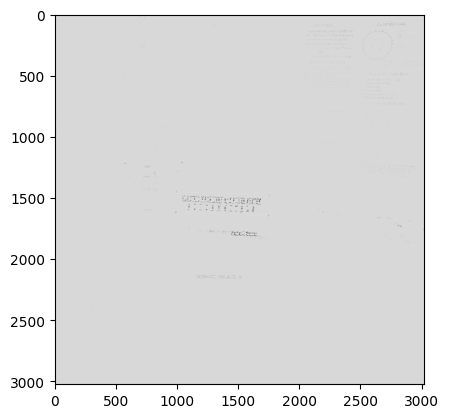

In [58]:
trace = A+B
determinant = A*B - C**2

k = 0.06

harris = determinant - k * np.square(trace)
dilated = cv.dilate(harris, np.ones((5,5)))

plt.imshow(dilated, cmap='gray_r')

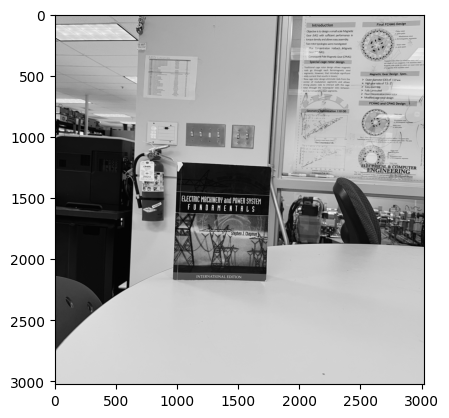

In [61]:
img_harris = img_gray.copy()
dst = cv.cornerHarris(img_harris, blockSize=3,ksize=3,k=0.06)
h_gray = cv.cvtColor(img_harris,cv.COLOR_GRAY2RGB)
plt.imshow(h_gray, cmap='gray')


**Select a threshold for the figure of merit. Show the points that are above the threshold on the grayscale version of the original image**
---

**Try a variation of the Harris corner detector with a different figure of merit. Select a threshold that selects the same number of features as the original Harris detector. Show the points that are above the threshold on the grayscale version of the original image. How does this variation compare?**
---

**Explain and justify the variation that you chose**
---

**Show detected "corners" in a series of at least 4 images of very different scenes to see how this algorithm works in a variety of images**
---

# Reflections

**What, if anything, did you learn from this assignment?**
---
**What questions do you have for me?**
---